In [1]:
# Imports and path definitions

import sys
import os
import plotly.plotly as py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from itertools import combinations

path = os.getcwd() + '/'

# NEW APPROACH

** Pre analysis -- hiperfino = 0 -- control soble niveles
~ Parallel and isotrope hyperfine
Polinomios de intervalos  5/3 puntos de H

1. Run your simpre calculation and plot your results.
2. Define a trainning data set region without non-avoided crossings
    - Minimum of 3-5 points (plot your results)
3. Run Poly.py 
4. Run expected_values.py
5. Run main.py

n. of points: 202


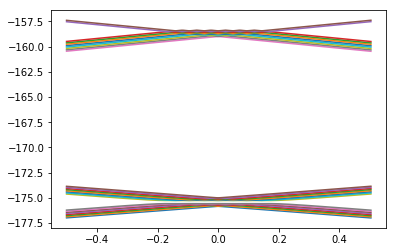

In [194]:
ene_f = path + "simpre.ene"

ene = np.loadtxt(ene_f, dtype= float)

#plt.plot(ene[:,0], ene[:,[1,2,3,4, 5, 6, 7,8, 9,10, 11, 12, 13, 14, 15, 16]])
plt.plot(ene[:,0], ene[:,1:])
#plt.savefig('plot_ene.png', dpi = 300)

print 'n. of points: ' + str(len(ene))
plt.show()


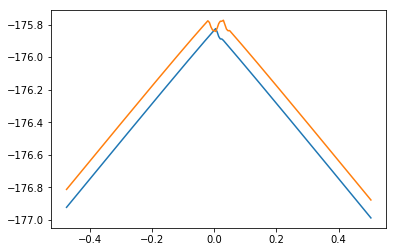

                lvl_1        lvl_2        lvl_3        lvl_4        lvl_5  \
-0.50101          NaN          NaN          NaN          NaN          NaN   
-0.49601          NaN          NaN          NaN          NaN          NaN   
-0.49101          NaN          NaN          NaN          NaN          NaN   
-0.48601          NaN          NaN          NaN          NaN          NaN   
-0.48101          NaN          NaN          NaN          NaN          NaN   
-0.47601  -176.922718  -176.812586  -176.702560  -176.592670  -176.482959   
-0.47101  -176.911112  -176.800990  -176.690977  -176.581104  -176.471415   
-0.46601  -176.899508  -176.789396  -176.679396  -176.569540  -176.459873   
-0.46101  -176.887904  -176.777803  -176.667817  -176.557978  -176.448335   
-0.45601  -176.876302  -176.766211  -176.656239  -176.546418  -176.436799   
-0.45101  -176.864700  -176.754621  -176.644663  -176.534861  -176.425266   
-0.44601  -176.853100  -176.743032  -176.633088  -176.523305  -176.413737   

In [23]:
# Evaluate expected values

#plt.plot(expected_df.index, expected_df.iloc[:,1:])
plt.plot(expected_df.index, expected_df.iloc[:,[0,1,]])
#plt.savefig('plot_prev.png', dpi = 300)

#print 'n. of points: ' + str(len(ene_prev))
plt.show()
print expected_df

In [78]:
print e
print expected_df.iloc[247, 8]
print ene_df.iloc[247, 8]

-175.1607809
-175.1607809


In [3]:
#
## Functions module
#

def poly(five_H, five_E): #dataset with set of points: would retrieve 
    #print five_E
    #print five_H
    x = five_H # set campos H (5)
    y = five_E # set valores E (5)
        
    vec_z = np.polyfit(x, y, deg = 2)
    return vec_z
    
    #poli_out = open(path + 'poli.out', 'w')
    #poli_out.write('name\tk0\tk1\tk2\n')
    #poli_out.write(i + '\t' + str(k0) + '\t' + str(k1) + '\t' + str(k2))
    #poli_out.write('\n')
    #poli_out.close()


def expected_E(vec_z, H_v):
    k0 = vec_z[2]
    k1 = vec_z[1]
    k2 = vec_z[0]
    predicted_E = (k2 * (float(H_v)**2)) + (k1 * float(H_v)) + k0
    return predicted_E
    #expec_out.write(str(v) + '\t')


def truncate(f, n):
    '''Truncates/pads a float f to n decimal places without rounding'''
    s = '{}'.format(f)
    if 'e' in s or 'E' in s:
        return '{0:.{1}f}'.format(f, n)
    i, p, d = s.partition('.')
    return '.'.join([i, (d+'0'*n)[:n]])

In [4]:
#
## Initial definitions
#

# Defined by the user so far; automatize for the future
J = float(8)
I = float(7.5)
g_par = 0.0000
g_per = 0.0000

# Lists
tot_lvls = int((2*J + 1)*(2*I + 1))
m_j = list(range(int(-(2*J)), int((2*J+2)), int(2)))
m_i = list(range(int(-(2*I)), int((2*I+2)), int(2)))

lvls_list = []
for i in list(range(np.size(ene, axis=1)-1)):
    lvls_list.append('lvl_'+ str(i+1))

## Generate projections list from m_j and m_i
projections_l = []
for j in m_j:
    for i in m_i:
        proj = str(j) + '/' + str(i)
        projections_l.append(proj)

#print projections_l
#print lvls_list
print tot_lvls


272


In [95]:
#
##
### Loading datasets
##
#

# Loads polynomios file
#with open(path + 'poli.out', 'r') as poli_f:
#    poli_df = pd.read_csv(poli_f, sep='\t', header=0, index_col=0)#, dtype=float)


# Loads new 'simpre.ene' file with energies of each level (quantum number) at diff H field
with open(path + 'simpre.ene', 'r') as ene_f:
    ene = np.loadtxt(ene_f, dtype= float)
    ene_df = pd.DataFrame(data=ene[0:,1:],  index=ene[0:,0] , columns=lvls_list)

if float(0.0) in ene_df.index:
    ene_df = ene_df.drop([0.0])
    


# Creating an empty DF for further lvl ordering
H_values = ene_df.index
expected_df = pd.DataFrame(index=H_values, columns=lvls_list)
final_df = pd.DataFrame(index=H_values, columns=lvls_list)
order_df = pd.DataFrame(index=H_values, columns=lvls_list)

# Fill first 5 positions of order_df
c = 0
for i in lvls_list:
    c=0
    for i2 in H_values:
        c+=1
        if c < 6 :
            order_df.loc[i2, i] = i.replace('lvl_' , '')

            
print order_df.iloc[6,1]
print ene_df.iloc[6,1]
#print expected_df.iloc[:,1]


nan
-176.8009908


In [135]:
 print order_df.loc

         lvl_1 lvl_2 lvl_3 lvl_4 lvl_5 lvl_6 lvl_7 lvl_8 lvl_9 lvl_10  ...    \
-0.50101     1     2     3     4     5     6     7     8     9     10  ...     
-0.49601     1     2     3     4     5     6     7     8     9     10  ...     
-0.49101     1     2     3     4     5     6     7     8     9     10  ...     
-0.48601     1     2     3     4     5     6     7     8     9     10  ...     
-0.48101     1     2     3     4     5     6     7     8     9     10  ...     
-0.47601     1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...     
-0.47101     1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...     
-0.46601     1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...     
-0.46101     1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...     
-0.45601     1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...     
-0.45101     1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ...     
-0.44601     1   NaN   NaN   NaN   NaN  

In [192]:
#
##
### Loading datasets
##
#

# Loads polynomios file
#with open(path + 'poli.out', 'r') as poli_f:
#    poli_df = pd.read_csv(poli_f, sep='\t', header=0, index_col=0)#, dtype=float)


test_list = []

# Loads new 'simpre.ene' file with energies of each level (quantum number) at diff H field
with open(path + 'simpre.ene', 'r') as ene_f:
    ene = np.loadtxt(ene_f, dtype= float)
    ene_df = pd.DataFrame(data=ene[0:,1:],  index=ene[0:,0] , columns=lvls_list)

if float(0.0) in ene_df.index:
    ene_df = ene_df.drop([0.0])
    


# Creating an empty DF for further lvl ordering
H_values = ene_df.index
expected_df = pd.DataFrame(index=H_values, columns=lvls_list)
final_df = pd.DataFrame(index=H_values, columns=lvls_list)
order_df = pd.DataFrame(index=H_values, columns=lvls_list)

# Fill first 5 positions of order_df
c = 0
for i in lvls_list:
    c=0
    for i2 in H_values:
        c+=1
        if c < 6 :
            order_df.loc[i2, i] = i.replace('lvl_' , '')


            
            
# Open out files
expec_out = open('expected_values.out', 'w')
poli_out = open('poli.out', 'w')

#
##
### Main loop
##
#

#print order_df

n = 0
for i0 in lvls_list:

    c0 = 0
    c1=0
    
    n+= 1
    
    five_H = []
    five_E = []
    d_poli = {}
    
    poli_out.write(i0 + '\n' )
    
    
    for i1 in H_values:
        print i1
        c0 += 1
        c1 += 1     
        
        # Rellenar listas
        five_H.append(i1)
        
        print col
        print row
        pos = order_df.loc[i1, i0]
        col = int(pos)-1
        row = int(c1)-1
        print col
        print row
        five_E.append(ene_df.iloc[row, col])
        
        
        #print five_E
        #print five_H
        
        
        if len(five_H) ==5:
            
            # Fitting
            vec_poly = poly(five_H, five_E)
            p = np.poly1d(vec_poly)
            d_poli[i1] = p
            poli_out.write('H: ' + str(H_values[c1-1]) + ' ' + str(p) +'\n') #+ ' ' + five_H + ' ' + five_E + '\n')
            
            
            if c1 == len(H_values):
                continue
            
            else:
                
                H_next = float(H_values[c1])
                #print H_next
                #H_v = '%.8f' % H_next
                #H_v = truncate(H_next, 5)

                
                # Calculate expected_v for the next H value
                expected_v = float(expected_E(vec_poly, H_next))
                v = '%.7f' % expected_v
                v1 = truncate(expected_v, 6)
                v2 = truncate(expected_v, 4)
                v3 = truncate(expected_v, 3)

                expected_df.loc[H_next, i0] = v


                # Search expected values in ene_df
                ene_1 = float(ene_df.loc[H_next, i0])
                e0 = '%.7f' % ene_1
                e1 = truncate(ene_1, 6)
                e2 = truncate(ene_1, 4)
                e3 = truncate(ene_1, 3)


                if v1 == e1:
                    order_df.loc[H_next, i0] = i0.replace('lvl_', '')
                    print v
                    print e1
                    print H_next
                    print 'valor exacto'

                elif v2 == e2:
                    order_df.loc[H_next, i0] = i0.replace('lvl_', '')
                    print 'valor exacto-2'
                
                elif v3 == e3:
                    order_df.loc[H_next, i0] = i0.replace('lvl_', '')
                    print 'valor exacto-3'

                else: ### time to re-order!!
                    print v
                    print e1
                    
                    print 'no match'
                    
                    print ene_df.loc[H_next]
                    
                    c4 = 0
                    
                    for i3 in lvls_list:
                        c4 += 1
                        
                        if v1 == truncate(ene_df.loc[H_next, i3], 6):
                            order_df.loc[H_next, i0] = c4
                            print 'yes 1'
                            continue
                        
                        elif v2 == truncate(ene_df.loc[H_next, i3], 4):
                            order_df.loc[H_next, i0] = c4
                            print c4
                            print 'yes 2'
                            continue
                        
                        elif v3 == truncate(ene_df.loc[H_next, i3], 3):
                            order_df.loc[H_next, i0] = c4
                            print c4
                            print 'yes 3'
                            continue
                        
                        #else: 
                        #    print H_next
                        #    print 
                        #    print 'escribe nan'
                        #    print 'ene' + str(e1)
                        #    print 'expected' + str(v)
                        #    print truncate(ene_df.loc[H_next, i3],3)
                        #    print c4
                        #    order_df.loc[H_next, i0] = 'nan'
                            
                    
                    

                c0 = c0-1
                five_E.pop(0)
                five_H.pop(0)
    
    poli_out.write('\n')
#print expected_df

order_df.to_csv(path + 'order.txt', header = lvls_list, sep=' ', na_rep='na')
expected_df.to_csv(path + 'expected.txt', header = lvls_list, sep=' ', na_rep='na')
    
## Condition 1 : compare pends (k1)
   
## Condition 2 : compare second derivative (k2)
    
## Condition 3 : allowed/non-allowed transitions (+/- 1) 
expec_out.close()
poli_out.close()

-0.50101
0
100
0
0
-0.49601
0
0
0
1
-0.49101
0
1
0
2
-0.48601
0
2
0
3
-0.48101
0
3
0
4
-176.9227182
-176.922718
-0.47601
valor exacto
-0.47601
0
4
0
5
-176.9111128
-176.911112
-0.47101
valor exacto
-0.47101
0
5
0
6
-176.8995081
-176.899508
-0.46601
valor exacto
-0.46601
0
6
0
7
-176.8879047
-176.887904
-0.46101
valor exacto
-0.46101
0
7
0
8
-176.8763021
-176.876302
-0.45601
valor exacto
-0.45601
0
8
0
9
-176.8647006
-176.864700
-0.45101
valor exacto
-0.45101
0
9
0
10
-176.8531003
-176.853100
-0.44601
valor exacto
-0.44601
0
10
0
11
valor exacto-2
-0.44101
0
11
0
12
-176.8299027
-176.829902
-0.43601
valor exacto
-0.43601
0
12
0
13
-176.8183055
-176.818305
-0.43101
valor exacto
-0.43101
0
13
0
14
-176.8067096
-176.806709
-0.42601
valor exacto
-0.42601
0
14
0
15
-176.7951147
-176.795114
-0.42101
valor exacto
-0.42101
0
15
0
16
-176.7835213
-176.783521
-0.41601
valor exacto
-0.41601
0
16
0
17
valor exacto-2
-0.41101
0
17
0
18
valor exacto-2
-0.40601
0
18
0
19
-176.7487482
-176.748748
-0.40

-175.7608409
-175.908017
no match
lvl_1    -175.908017
lvl_2    -175.804314
lvl_3    -175.760856
lvl_4    -175.705883
lvl_5    -175.666555
lvl_6    -175.620510
lvl_7    -175.592598
lvl_8    -175.571547
lvl_9    -175.261738
lvl_10   -175.240688
lvl_11   -175.212775
lvl_12   -175.166731
lvl_13   -175.127403
lvl_14   -175.072430
lvl_15   -175.028972
lvl_16   -174.925269
lvl_17   -159.087988
lvl_18   -158.949545
lvl_19   -158.889713
lvl_20   -158.811103
lvl_21   -158.751270
lvl_22   -158.672660
lvl_23   -158.612828
lvl_24   -158.534218
lvl_25   -158.474385
lvl_26   -158.395775
Name: 0.03399, dtype: float64
3
yes 2
0.03399
2
106
2
107
-175.7504299
-175.919116
no match
lvl_1    -175.919117
lvl_2    -175.815059
lvl_3    -175.750447
lvl_4    -175.715846
lvl_5    -175.657438
lvl_6    -175.628399
lvl_7    -175.587143
lvl_8    -175.573773
lvl_9    -175.259513
lvl_10   -175.246142
lvl_11   -175.204887
lvl_12   -175.175848
lvl_13   -175.117440
lvl_14   -175.082839
lvl_15   -175.018227
lvl_16   -174

Name: 0.11899, dtype: float64
0.11899
5
123


ValueError: cannot convert float NaN to integer

In [193]:
#print order_df
print order_df.loc[0.00399]
print expected_df.loc[0.00399]
print ene_df.loc[0.00399]


lvl_1       2
lvl_2     NaN
lvl_3     NaN
lvl_4     NaN
lvl_5     NaN
lvl_6     NaN
lvl_7     NaN
lvl_8     NaN
lvl_9     NaN
lvl_10    NaN
lvl_11    NaN
lvl_12    NaN
lvl_13    NaN
lvl_14    NaN
lvl_15    NaN
lvl_16    NaN
lvl_17    NaN
lvl_18    NaN
lvl_19    NaN
lvl_20    NaN
lvl_21    NaN
lvl_22    NaN
lvl_23    NaN
lvl_24    NaN
lvl_25    NaN
lvl_26    NaN
Name: 0.00399, dtype: object
lvl_1     -175.8247348
lvl_2              NaN
lvl_3              NaN
lvl_4              NaN
lvl_5              NaN
lvl_6              NaN
lvl_7              NaN
lvl_8              NaN
lvl_9              NaN
lvl_10             NaN
lvl_11             NaN
lvl_12             NaN
lvl_13             NaN
lvl_14             NaN
lvl_15             NaN
lvl_16             NaN
lvl_17             NaN
lvl_18             NaN
lvl_19             NaN
lvl_20             NaN
lvl_21             NaN
lvl_22             NaN
lvl_23             NaN
lvl_24             NaN
lvl_25             NaN
lvl_26             NaN
Name: 0.0

In [141]:
print ene_df.iloc[78]

lvl_1    -176.081147
lvl_2    -175.973958
lvl_3    -175.868491
lvl_4    -175.766304
lvl_5    -175.671381
lvl_6    -175.616552
lvl_7    -175.595671
lvl_8    -175.570726
lvl_9    -175.262560
lvl_10   -175.237615
lvl_11   -175.216734
lvl_12   -175.161905
lvl_13   -175.066981
lvl_14   -174.964796
lvl_15   -174.859328
lvl_16   -174.752140
lvl_17   -159.312630
lvl_18   -159.174187
lvl_19   -159.035744
lvl_20   -158.897302
lvl_21   -158.758859
lvl_22   -158.665071
lvl_23   -158.620417
lvl_24   -158.526629
lvl_25   -158.481974
lvl_26   -158.388186
Name: -0.11101, dtype: float64


In [127]:
#print ene_df
n = float(-176.7893967)
#print ene_df.iloc[7]

print ene_df.loc[-0.46601, 'lvl_2']
print ene_df.index



if n in ene_df.loc[-0.46601]:
    print 'yes'

-176.7893967
Float64Index([-0.50101, -0.49601, -0.49101, -0.48601, -0.48101, -0.47601,
              -0.47101, -0.46601, -0.46101, -0.45601,
              ...
               0.45899,  0.46399,  0.46899,  0.47399,  0.47899,  0.48399,
               0.48899,  0.49399,  0.49899,  0.50399],
             dtype='float64', length=202)


In [38]:
print expected_df.iloc[100,5:7]
print ene_df.iloc[100,5:7]
#print expected_df

lvl_6    -207.7121670
lvl_7    -207.7118580
Name: -0.001, dtype: object
lvl_6   -207.712167
lvl_7   -207.711858
Name: -0.001, dtype: float64


In [14]:
#print order_df

ene_df = np.array(ene_df)
order_df = np.array(order_df)

dims = ene_df.shape
print dims
tsize = dims[0]*dims[1]


#Recreate the ene_df array using the labels from order_df as a mask

df_final = np.arange(tsize).reshape(dims[0], dims[1])
df_final = np.array(df_final, dtype='float32')

for i in range(dims[0]):
    for j in range(dims[1]):
        label = int(order_df[i,j])
        i = int(i)
        j = int(j)
        if label == j+1:
            df_final[i,j] = ene_df[i,j]
        else:
            df_final[i,j] = ene_df[i,label-1] 
        

df_final = pd.DataFrame(df_final)
df_final.to_csv(path + 'final.txt', header = lvls_list, sep='\t', na_rep='na')

(206, 26)
             0           1           2           3           4           5   \
0   -207.806519 -207.805298 -207.804352 -207.800613 -207.798615 -207.791962   
1   -207.805832 -207.804611 -207.803665 -207.799896 -207.797897 -207.791183   
2   -207.805161 -207.803925 -207.802979 -207.799164 -207.797180 -207.790390   
3   -207.804489 -207.803253 -207.802307 -207.798447 -207.796478 -207.789597   
4   -207.803833 -207.802567 -207.801636 -207.797729 -207.795761 -207.788818   
5   -207.803162 -207.801895 -207.800949 -207.797028 -207.795059 -207.788025   
6   -207.802490 -207.801208 -207.800278 -207.796310 -207.794342 -207.787231   
7   -207.801834 -207.800537 -207.799606 -207.795593 -207.793640 -207.786453   
8   -207.801178 -207.799866 -207.798935 -207.794891 -207.792938 -207.785660   
9   -207.800522 -207.799194 -207.798279 -207.794174 -207.792236 -207.784866   
10  -207.799866 -207.798523 -207.797607 -207.793472 -207.791534 -207.784088   
11  -207.799210 -207.797867 -207.796951 -2

Eigen module

In [ ]:
#
##
### Functions
##
#
def pend(l_real, l_imag, l_projections, n):
    g = float(7)/6
    beta = 0.46686
    l_mj = []
    
    for i in l_projections:
        vec = i.split('/')
        l_mj.append(float(vec[0]))
    l = list(range(0,n))
    coef_l = []
    
    for i in l:
        x = complex(float(l_real[i]), float(l_imag[i]))    # complex
        coef_i = g*beta*(abs(x)**2)*l_mj[i]  # complex
        coef_l.append(coef_i)
    coef = sum(coef_l)
    
    return coef#, coef_l


def compare_pend(d_pends, d_eigenvectors): #d_eigenvalues
    d_dif = {}
    d_uniq = {}
    lim = 10**(-3)
    
        
    for a, b in combinations(d_pends, 2):
        #difE != 0
        # continue
        if d_eigenvectors[a] != d_eigenvectors[b]:
            value = abs(d_pends[a]- d_pends[b])

            if value < lim:
                d_dif[a + b] = value
    
    return d_dif


def sderivative(pend1, pend2, field1, field2):
    value = (float(pend1) - float(pend2)) / (float(campo1) - float(pend2))



In [98]:
#
##
### Slope calculation module from eigenvalues and eigenvectors
##
#

# Out files
out_f1 = open(path + 'global.out', 'w')
out_f3 = open(path + 'pends.out', 'w')
out_f3.write('H_value\t')

for i in list(range(1,tot_lvls+1)):
    out_f3.write('lvl_' + str(i) + '\t')
out_f3.write('\n')


#
## Parsing input file 'simpre.out'
#
with open(path + 'simpre.out', 'r') as f:
    lines = f.read().split('\n')




d_H = {}
H_values = []
d_eivec_pos = {}


c = 0
for i in lines:
    c+=1
    if 'Magnetic Field' in i:
        vec = i.split()
        H = vec[4]
        H_values.append(H)
        d_H[H] = c
        
    elif 'Eigenvectors' in i:
        d_eivec_pos[H] = c


c2 = 0
for i in H_values:
    c2 += 1
    out_f1.write('#################################################\n')
    out_f1.write('## Magnetic Field value = ' + str(i) + '\n')
    out_f1.write('#################################################\n\n')
    out_f1.write('## tag   EigValues   SpinProjections   pend   EigVect(R I)\n')
    
    out_f2 = open(path + 'temp_' + str(c2) + '.out', 'w')
    out_f2.write('#################################################\n')
    out_f2.write('## Magnetic Field value = ' + str(i) + '\n')
    out_f2.write('#################################################\n\n')
    out_f2.write('## tag   EigValues   SpinProjections   pend   EigVect(R I)\n')
    
    out_f3.write(str(i) + '\t')
    
    
    d_eigenvalues = {}
    d_eigenvectors = {}
    d_pend = {}
    l_pend = []
    
    eigenvalues_list = lines[(d_H[i] + 18) : (d_H[i] + 44) ] # 18 y 44 son valores fijos 
    
    for i2 in eigenvalues_list:
        vec = i2.split()
        d_eigenvalues['lvl_' + str(vec[3])] = vec[0]
        
    eigenvectors_list = lines[d_eivec_pos[i] : d_eivec_pos[i] + tot_lvls] # tot_lvls valor variable
    
    c3 = 0
    for i3 in eigenvectors_list:
        c3 += 1
        d_eigenvectors['lvl_' + str(c3)] = i3
        
    
    
    #
    ## Calculates slopes
    #
    for i4 in d_eigenvectors:
        vec = d_eigenvectors[i4].split()
        c_real =  vec[0::2]
        c_imag = vec[1::2]

        pend_i = pend(c_real, c_imag, projections_l,tot_lvls)
        d_pend[str(i4)] = pend_i
        l_pend.append(pend_i)
        

    ## Condition 1 : discriminates degeneracy and calculates difference between pends
    d_diffs = compare_pend(d_pend, d_eigenvalues)
    
    
    
    #### Writing temp_f and global .out
    for i in list(range(1,tot_lvls+1)):
        tag = 'lvl_' + str(i)
        out_f1.write(tag + ' ' + str(d_eigenvalues[tag]) + ' ' +  str(projections_l[i-1])
                    + ' ' + str(d_pend[tag]) + ' ' + str(d_eigenvectors[tag]) +  '\n')  # Falta Col [0/1] compare pend
        out_f2.write(tag + ' ' + str(d_eigenvalues[tag]) + ' ' +  str(projections_l[i-1])
                    + ' ' + str(d_pend[tag]) + ' ' + str(d_eigenvectors[tag]) +  '\n')  # Falta Col [0/1] compare pend
        
        out_f3.write(str(d_pend[tag]) + '\t')
    
    
    
    out_f1.write('\n\n\n')
    out_f1.write('## Differences map\n')
    out_f1.write('\n\n\n')
    
    out_f2.write('\n\n\n')
    out_f2.write('## Differences map\n')
    
    for i in d_diffs:
        out_f1.write(i + ' ' + str(d_diffs[i]) + '\n')
        out_f2.write(i + ' ' + str(d_diffs[i]) + '\n')
    
    out_f2.close()
    
    out_f3.write('\n')
    
    
    
    ## Break
    if c2 == 47:
        break



out_f1.close()
out_f3.close()

